# Project: TMDB Movie Data Explore

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

选择了TMDB movie data作为分析对象，试图对如下两个问题进行探索：
1. 哪种电影类型比较受欢迎？
2. 电影的revenue跟哪些属性比较相关？

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

In [42]:
# 数据加载，同时把id列设置为index
movie_data = pd.read_csv("tmdb-movies.csv").set_index('id')

In [43]:
# 显示前5行数据
movie_data.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [58]:
# 获得数据总行数
len(movie_data)

10866

In [57]:
# 获得popularity为0或nan的数据行数
(movie_data['popularity'].isnull() | movie_data['popularity'] == 0).sum()

0

In [62]:
# 获得genres为nan的数据
(movie_data['genres'].isnull()).sum()

23

In [63]:
# 展示部分genres数据的内容
movie_data['genres'].head()

id
135397    Action|Adventure|Science Fiction|Thriller
76341     Action|Adventure|Science Fiction|Thriller
262500           Adventure|Science Fiction|Thriller
140607     Action|Adventure|Science Fiction|Fantasy
168259                        Action|Crime|Thriller
Name: genres, dtype: object

从上面可以看出，genres为nan的行比例并不多，同时genres是用'|'进行分隔的，如果进一步分析需要分隔开。

下面为分析revenue数据进行一些探索。

In [200]:
len(movie_data[movie_data['revenue'] != 0])

4850

revenue字段为0的数据比例很高，将近60%。下面简单看看这些revenue为0的数据。

In [168]:
movie_data[movie_data['revenue'] == 0]

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,gambling|bodyguard|remake,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,new year's eve|fire|showdown|terrorist|embassy,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,tattoo|high school|leukemia|friends|parody,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,artificial intelligence|android|self-awareness...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.0
326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,sister sister relationship|birthday|song|birth...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,skyscraper|high rise,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.000000e+00,0.0
292040,tt3321300,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,http://www.shinepictures.co.uk/films/9/spooks-...,Bharat Nalluri,NaN,corruption|terrorist|explosive|police|kidnapping,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.000000e+00,0.0


通过上面revenue为0的电影数据，发现可能由于数据没采集到的原因，进行revenue分析需要过滤掉这些数据。下面看看revenue不为0的电影数据，相关数据字段的情况。

In [176]:
len(movie_data[(movie_data['revenue'] != 0) & (movie_data['budget'] != 0)])

3855

通过budget为0又过滤掉一些电影数据。

In [177]:
len(movie_data[(movie_data['revenue'] != 0) 
               & (movie_data['budget'] != 0)
               & (movie_data['popularity'] != 0)
               & (movie_data['vote_count'] != 0)
               & (movie_data['vote_average'] != 0)
               & (movie_data['runtime'] != 0)
              ])

3855

其他数值字段没有为0的情况。

### 过滤并分拆Genres字段

In [72]:
# 过滤掉genres字段为nan的行
movie_data_popularity_analysis = movie_data[movie_data['genres'].notnull()]

In [90]:
# 获取所有电影类型
all_genres = set()
for genres in movie_data_popularity_analysis['genres']:
    for item in genres.split('|'):
        all_genres.add(item)
all_genres = list(all_genres)

In [94]:
def split_genres_column(row):
    movie_genres = set(row['genres'].split('|'))
    for genres in all_genres:
        if genres in movie_genres:
            row[genres] = row['popularity']
        else:
            row[genres] = np.nan
    return row
movie_data_popularity_analysis = movie_data_popularity_analysis.apply(split_genres_column, axis=1)

上面首先获取所有的电影类型(Adventure, Science Fiction等)，为每种电影类型创建一个单独的字段。对于每部电影数据，对genres字段分拆，如果本部电影属于某种类型则相应cell赋值为popularity字段的值，否则为np.nan。为后续统计做准备。

### 为revenue分析进行数据清洗

In [181]:
# 清洗掉budget和revenue字段为0的电影数据，并只保留相应的待分析字段
movie_data_revenue_analysis = movie_data[(movie_data['revenue'] != 0) & (movie_data['budget'] != 0)][['revenue', 'popularity', 'budget', 'vote_average', 'vote_count', 'runtime']]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 分析1：哪种类型的电影Popularity更高？

In [125]:
# 统计各类型电影popularity的均值，并倒序排序
movie_data_popularity_analysis[all_genres].mean().sort_values(ascending=False)

Adventure          1.154259
Science Fiction    1.001218
Fantasy            0.992840
Action             0.926136
Animation          0.852182
Family             0.786668
Crime              0.744821
Thriller           0.741513
War                0.727683
Mystery            0.690012
Comedy             0.592607
Romance            0.592082
Drama              0.591496
Western            0.590615
History            0.575936
Music              0.487321
Horror             0.465357
TV Movie           0.270896
Foreign            0.191496
Documentary        0.181432
dtype: float64

单从统计结果上来看，冒险(Adventure)、科幻(Science Fiction)、魔幻(Fantasy)、动作(Action)、动画片(Animation)属于前五种受欢迎的类型。这五种类型电影按发行年份(release_year)统计的popularity均值如下：

Text(0,0.5,u'popularity')

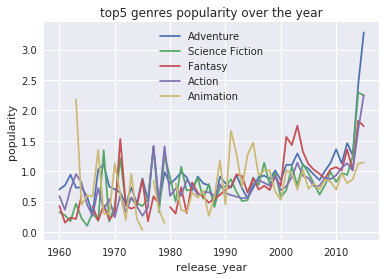

In [217]:
movie_data_popularity_analysis.groupby('release_year')[['Adventure', 'Science Fiction', 'Fantasy', 'Action', 'Animation']].mean().plot()
plt.title('top5 genres popularity over the year')
plt.ylabel('popularity')

单从统计结果来看，按发行年份统计五种类型电影的popularity均值，没有哪种电影类型有绝对的优势，除了冒险类电影在2015年popularity的均值较高。

上面的统计可能覆盖了全部的电影，使得统计数字看上去差别不大，下面针对popularity前100的电影进行分析。

In [139]:
# 按popularity字段倒序排序，并取前100的电影
movie_data_popularity_analysis_top = movie_data_popularity_analysis.sort_values(by='popularity', ascending=False).iloc[:100]

In [142]:
# 按电影类型统计popularity均值并倒序排序
movie_data_popularity_analysis_top[all_genres].mean().sort_values(ascending=False)

Science Fiction    8.869054
Thriller           8.600438
Adventure          8.307085
History            8.110711
Action             7.818921
Drama              7.047575
Western            6.984539
Horror             6.792975
Animation          6.790518
Fantasy            6.563886
War                6.525378
Crime              6.405802
Mystery            6.353075
Comedy             6.234862
Romance            6.136392
Family             6.021273
Music                   NaN
Foreign                 NaN
TV Movie                NaN
Documentary             NaN
dtype: float64

从popularity top 100的电影数据看出，科幻、冒险、动作依然是最受欢迎的前五类型。

### 分析2：revenue受哪些因素影响？

In [187]:
corrs = movie_data_revenue_analysis.corr()

In [199]:
corrs

,revenue,popularity,budget,vote_average,vote_count,runtime
revenue,1.000000,0.615556,0.688548,0.227279,0.754583,0.250398
popularity,0.615556,1.000000,0.446993,0.317924,0.780106,0.215157
budget,0.688548,0.446993,1.000000,0.024227,0.556939,0.260989
vote_average,0.227279,0.317924,0.024227,1.000000,0.387271,0.351909
vote_count,0.754583,0.780106,0.556939,0.387271,1.000000,0.273842
runtime,0.250398,0.215157,0.260989,0.351909,0.273842,1.000000


Text(0,0.5,u'correlation')

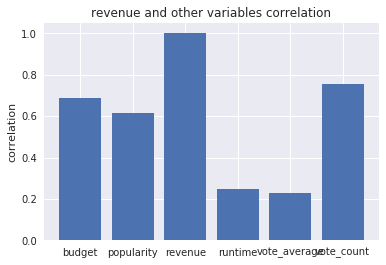

In [214]:
plt.bar(corrs['revenue'].index, corrs['revenue'].values)
plt.title('revenue and other variables correlation')
plt.ylabel('correlation')

用散点图展示revenue和vote_count的相关性。

Text(0,0.5,u'vote_count')

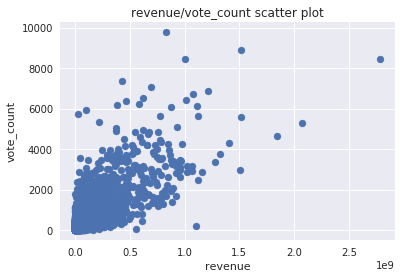

In [212]:
plt.scatter(movie_data['revenue'], movie_data['vote_count'])
plt.title('revenue/vote_count scatter plot')
plt.xlabel('revenue')
plt.ylabel('vote_count')

用散点图展示revenue和budget的相关性。

Text(0,0.5,u'budget')

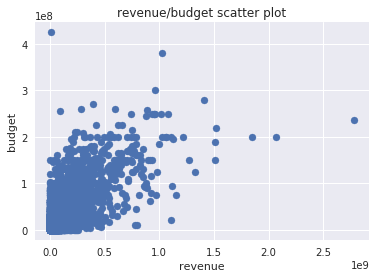

In [210]:
plt.scatter(movie_data['revenue'], movie_data['budget'])
plt.title('revenue/budget scatter plot')
plt.xlabel('revenue')
plt.ylabel('budget')

用散点图展示revenue和popularity的相关性。

Text(0,0.5,u'popularity')

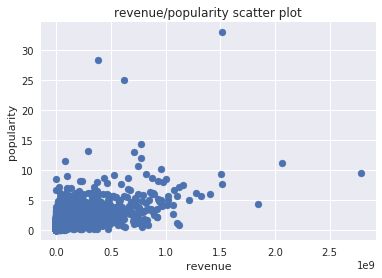

In [209]:
plt.scatter(movie_data['revenue'], movie_data['popularity'])
plt.title('revenue/popularity scatter plot')
plt.xlabel('revenue')
plt.ylabel('popularity')

通过相关性分析，有如下发现：
1. revenue跟vote_count相关性较大(0.75)
2. revenue跟budget也有一定的相关性 (0.69)
3. revenue跟popularity有一定的相关性 (0.62)

<a id='conclusions'></a>
## Conclusions

需要声明的是，如下的结论是暂时的，因为没有进行相应的严格的实验和statistical tests。

#### Popularity分析

从获得的数据集来看，科幻、冒险、动作片可能是popularity比较高的类别。

#### Revenue相关性分析

从获得的数据集来看，vote_count与revenue相关性较大，budget和popularity与revenue也有一定的相关性，而runtime和vote_average与revenue相关性不太大。